## Import Necessary Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import datetime
import seaborn as sns
import os

## Extract Data

In [2]:
inspections = pd.read_csv('../rawdata/inspections.csv')
violations = pd.read_csv('../rawdata/violations.csv')

## Data Exploration

In [3]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386336 entries, 0 to 386335
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ACTIVITY DATE         386336 non-null  object
 1   OWNER ID              386336 non-null  object
 2   OWNER NAME            386336 non-null  object
 3   FACILITY ID           386336 non-null  object
 4   FACILITY NAME         386336 non-null  object
 5   RECORD ID             386336 non-null  object
 6   PROGRAM NAME          386336 non-null  object
 7   PROGRAM STATUS        386336 non-null  object
 8   PROGRAM ELEMENT (PE)  386336 non-null  int64 
 9   PE DESCRIPTION        386336 non-null  object
 10  FACILITY ADDRESS      386336 non-null  object
 11  FACILITY CITY         386336 non-null  object
 12  FACILITY STATE        386336 non-null  object
 13  FACILITY ZIP          386336 non-null  int64 
 14  SERVICE CODE          386336 non-null  int64 
 15  SERVICE DESCRIPTI

In [4]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   SERIAL NUMBER          1048575 non-null  object 
 1   VIOLATION  STATUS      1048575 non-null  object 
 2   VIOLATION CODE         1048575 non-null  object 
 3   VIOLATION DESCRIPTION  1048575 non-null  object 
 4   POINTS                 1048575 non-null  float64
dtypes: float64(1), object(4)
memory usage: 40.0+ MB


In [5]:
inspections.columns = inspections.columns.str.lower()
inspections.columns = inspections.columns.str.replace(' ','_')
violations.columns = violations.columns.str.lower()
violations.columns = violations.columns.str.replace(' ','_')

In [6]:
inspections.score.max(), inspections.score.min()

(100, 3)

In [7]:
violations.points.max(), violations.points.min()

(11.0, 0.0)

* Inspections Score MAX value shows us there are some restaurants that got perfect scores

In [8]:
inspections['serial_number'].nunique(),violations['serial_number'].nunique()

(386336, 224009)

In [9]:
merged_df = pd.merge(inspections, violations, how = 'left', on = 'serial_number')

In [10]:
merged_df.head()

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,facility_zip,service_code,service_description,score,serial_number,employee_id,violation__status,violation_code,violation_description,points
0,11/10/2015,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,90505,1,ROUTINE INSPECTION,93,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F027,# 27. Food separated and protected,1.0
1,11/10/2015,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,90505,1,ROUTINE INSPECTION,93,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F037,# 37. Adequate ventilation and lighting; desig...,1.0
2,11/10/2015,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,90505,1,ROUTINE INSPECTION,93,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0
3,11/10/2015,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,90505,1,ROUTINE INSPECTION,93,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0
4,11/10/2015,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,90505,1,ROUTINE INSPECTION,93,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F036,"# 36. Equipment, utensils and linens: storage ...",1.0


In [11]:
merged_df['activity_date'] = pd.to_datetime(merged_df['activity_date'])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1210653 entries, 0 to 1210652
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   activity_date          1210653 non-null  datetime64[ns]
 1   owner_id               1210653 non-null  object        
 2   owner_name             1210653 non-null  object        
 3   facility_id            1210653 non-null  object        
 4   facility_name          1210653 non-null  object        
 5   record_id              1210653 non-null  object        
 6   program_name           1210653 non-null  object        
 7   program_status         1210653 non-null  object        
 8   program_element_(pe)   1210653 non-null  int64         
 9   pe_description         1210653 non-null  object        
 10  facility_address       1210653 non-null  object        
 11  facility_city          1210653 non-null  object        
 12  facility_state         12106

### Understanding the Scoring
* Points column is the number of points taken for the violation.
* Score is the overall inpsection score out of 100.
---
* Information from LA County Food Inspection Reference Guide:
__[Inspection Guide](http://www.publichealth.lacounty.gov/eh/docs/RefGuideFoodInspectionReport.pdf)__

>* Major Violation results in 4 pt Deduction
>* Two Major Violations result in additional 3pt deduction and possible closure
>* Permit suspension due to vermin infestation, no water, or now sewage available, additional 7pt deduction for each closure type
>* Minor Violation result in 2pt deduction
>* Good Retail Practicies (Low Risk Violations), result in 1 pt violation

### Additional Notes

* Serial Number is unique ID for each inspection
* Record ID is a UNIQUE ID number for each health program at a facility. A facility can have multiple programs!
* Program name is a unique name for each program

* Now restaurants that got perfect scores are included in the merged data frame --> look at null values in violation_status, violation_code, violation_description, and points
* Split the program elements part!
* Analyze by program elements broken down
* Break down the date time by year --> analyze by year
* Analyze by month!

* Now inspect score and number of inspections by year and month
* First remove duplicates --> serial numbers change with each inspection --> remove duplicates for that to get the accurate count and distribution for scores

In [12]:
merged_df['year'] = merged_df['activity_date'].dt.year
merged_df['month'] = merged_df['activity_date'].dt.month
merged_df['day'] = merged_df['activity_date'].dt.day
merged_df['quarter'] = merged_df['activity_date'].dt.quarter
merged_df.head()

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,serial_number,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter
0,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F027,# 27. Food separated and protected,1.0,2015,11,10,4
1,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F037,# 37. Adequate ventilation and lighting; desig...,1.0,2015,11,10,4
2,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0,2015,11,10,4
3,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0,2015,11,10,4
4,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DA0EU4KUG,EE0000306,OUT OF COMPLIANCE,F036,"# 36. Equipment, utensils and linens: storage ...",1.0,2015,11,10,4


### Categorize Violations as Major, Minor, Critical using Points and Violation Code

Match point value with violation codes based on the reference book above. 
* Critical -> 11 pts deduction
* Major --> 4 pts deduction
* Minor --> 2 pts deduction
* Retail Practices --> 1 pt deduction
* Double Major --> 3pt reduction
* NaN for all that don't match conditions

In [13]:
merged_df['points'].value_counts(dropna = False)

1.0     792962
2.0     187705
NaN     162415
4.0      48694
0.0      14366
3.0       2324
11.0      2187
Name: points, dtype: int64

In [14]:
zero = merged_df[merged_df['points'] == 0.0]
zero[zero['violation_code']=='F021']

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,serial_number,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter
205819,2016-06-07,OW0030630,ROMAN INC,FA0037751,MARISCOS SAN ISIDRO,PR0001060,MARISCOS SAN ISIDRO,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DAH5EMEOW,EE0000592,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2016,6,7,2
289189,2017-01-19,OW0022348,LOVE SUSHI II INC.,FA0036104,LOVE SUSHI,PR0021087,LOVE SUSHI,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,DAEZVGAFY,EE0000364,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,1,19,1
334406,2017-03-09,OW0226883,MARICELA MEDINA,FA0221954,LITO'S CORK ROOM,PR0176941,LITO'S CORK ROOM,ACTIVE,1633,RESTAURANT (31-60) SEATS LOW RISK,...,DA0801180,EE0000081,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,3,9,1
346355,2017-03-20,OW0035201,"TECHAWUTIWAT, TANAPORN",FA0065827,LITTLE JASMINE THAI CUISINE,PR0017693,LITTLE JASMINE THAI CUISINE,INACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,DAMPBDTVI,EE0000067,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,3,20,1
349721,2017-03-23,OW0008418,"COBAR, RENE GUILLERMO",FA0002904,ADDY'S BAKERY,PR0017304,ADDY'S BAKERY,INACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,DAMHQ7JGY,EE0001009,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,3,23,1
351492,2017-02-21,OW0186096,GREGORIA ESCARENO,FA0180753,EL MARATIAL,PR0174555,EL MANANTIAL,INACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,DALFSRGXD,EE0000691,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,2,21,1
356004,2017-02-27,OW0178492,ALEJANDRO GERECERO ORTIZ,FA0171405,EL PESCADOR #11,PR0161474,EL PESCADOR #11,INACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DA110CDDI,EE0000145,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,2,27,1
357453,2017-04-04,OW0015476,HI WORLD CORPORATION,FA0038760,TSUJITA LA RESTAURANT,PR0031994,TSUJITA LA RESTAURANT,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,DAEVNWEA5,EE0000684,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,4,4,2
361713,2017-02-23,OW0185252,LAURA VILLAVICENCIO,FA0179759,LA MONARCA MICHOACANA,PR0173419,LA MONARCA MICHOACANA,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,DA7KIJ0E0,EE0000691,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,2,23,1
363052,2017-02-23,OW0186222,TAQUERIA LOS SANTOS,FA0180884,TAQUERIA LOS SANTOS,PR0174716,TAQUERIA LOS SANTOS,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,DAINGOISX,EE0000113,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2017,2,23,1


In [15]:
merged_df[merged_df['serial_number']=='DAH5EMEOW']
# 0.0 points with a violation --> duplicate values!!!

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,serial_number,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter
205817,2016-06-07,OW0030630,ROMAN INC,FA0037751,MARISCOS SAN ISIDRO,PR0001060,MARISCOS SAN ISIDRO,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DAH5EMEOW,EE0000592,OUT OF COMPLIANCE,F014,# 14. Food contact surfaces: clean and sanitized,4.0,2016,6,7,2
205818,2016-06-07,OW0030630,ROMAN INC,FA0037751,MARISCOS SAN ISIDRO,PR0001060,MARISCOS SAN ISIDRO,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DAH5EMEOW,EE0000592,OUT OF COMPLIANCE,F021,# 21b. Water available,4.0,2016,6,7,2
205819,2016-06-07,OW0030630,ROMAN INC,FA0037751,MARISCOS SAN ISIDRO,PR0001060,MARISCOS SAN ISIDRO,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DAH5EMEOW,EE0000592,OUT OF COMPLIANCE,F021,# 21b. Water available,0.0,2016,6,7,2
205820,2016-06-07,OW0030630,ROMAN INC,FA0037751,MARISCOS SAN ISIDRO,PR0001060,MARISCOS SAN ISIDRO,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,DAH5EMEOW,EE0000592,OUT OF COMPLIANCE,F052,# 01b. Food safety certification,2.0,2016,6,7,2


In [16]:
crit_code = ['F021','F022','F023']
maj_code = ['F002','F005','F007','F008','F009','F010','F011','F013','F014','F015','F020','F021','F022','F023','F054']
min_code = maj_code + ['F001','F003','F004','F006','F012','F016','F017','F018','F019','F022','F023','F052']
ret_code = ['F024','F025','F026','F027','F028','F029','F030','F031','F032','F033','F034','F035','F036','F037','F038',
            'F039','F040','F041','F042','F043','F044','F045','F046','F048']

In [17]:
conditions = [merged_df['violation_code'].isin(crit_code) & (merged_df['points'] == 11.0),\
              merged_df['violation_code'].isin(maj_code) & (merged_df['points'] == 4.0),\
              merged_df['violation_code'].isin(min_code) & (merged_df['points'] == 2.0),\
              merged_df['violation_code'].isin(ret_code) & (merged_df['points'] == 1.0),\
              merged_df['violation_code'].isin(maj_code) & (merged_df['points'] == 3.0)]

merged_df['violation_category'] = np.select(conditions, ['Critical','Major','Minor','Retail','DoubleMajor'], default = np.nan)

In [18]:
merged_df.head()

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter,violation_category
0,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000306,OUT OF COMPLIANCE,F027,# 27. Food separated and protected,1.0,2015,11,10,4,Retail
1,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000306,OUT OF COMPLIANCE,F037,# 37. Adequate ventilation and lighting; desig...,1.0,2015,11,10,4,Retail
2,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000306,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0,2015,11,10,4,Retail
3,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000306,OUT OF COMPLIANCE,F006,# 06. Adequate handwashing facilities supplied...,2.0,2015,11,10,4,Minor
4,2015-11-10,OW0126532,GEN TORRANCE LLC,FA0162834,GEN KOREAN BBQ,PR0150985,GEN KOREAN BBQ,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000306,OUT OF COMPLIANCE,F036,"# 36. Equipment, utensils and linens: storage ...",1.0,2015,11,10,4,Retail


### Categorize Based on Breakdown of pe_description
* Breakdown pe_description to facility type, size, risk level
* Use International Building Code guidelines to Standardize Capacity --> convert seat value to square feet
* 15 sq ft dedicated to one occupant
* Remove non-restaurant, non-caterer and food market retail??

In [19]:
merged_df['pe_description'].value_counts()

RESTAURANT (0-30) SEATS HIGH RISK                276881
RESTAURANT (31-60) SEATS HIGH RISK               224055
RESTAURANT (61-150) SEATS HIGH RISK              180171
RESTAURANT (0-30) SEATS MODERATE RISK            171401
FOOD MKT RETAIL (1-1,999 SF) LOW RISK             74607
RESTAURANT (151 + ) SEATS HIGH RISK               69592
FOOD MKT RETAIL (1-1,999 SF) HIGH RISK            50050
RESTAURANT (31-60) SEATS MODERATE RISK            33206
FOOD MKT RETAIL (2,000+ SF) LOW RISK              32242
RESTAURANT (61-150) SEATS MODERATE RISK           23846
RESTAURANT (0-30) SEATS LOW RISK                  22133
FOOD MKT RETAIL (2,000+ SF) HIGH RISK             19881
FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK        10739
RESTAURANT (31-60) SEATS LOW RISK                  7109
FOOD MKT RETAIL (2,000+ SF) MODERATE RISK          5874
RESTAURANT (151 + ) SEATS MODERATE RISK            3914
RESTAURANT (61-150) SEATS LOW RISK                 2832
RESTAURANT (151 + ) SEATS LOW RISK              

In [ ]:
df['']

### Drop Duplicates

In [20]:
# Serial numbers are unique for each inspection. 
dropped_dup = merged_df.drop_duplicates(subset = ['serial_number'], keep = 'first')
dropped_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386336 entries, 0 to 1210646
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   activity_date          386336 non-null  datetime64[ns]
 1   owner_id               386336 non-null  object        
 2   owner_name             386336 non-null  object        
 3   facility_id            386336 non-null  object        
 4   facility_name          386336 non-null  object        
 5   record_id              386336 non-null  object        
 6   program_name           386336 non-null  object        
 7   program_status         386336 non-null  object        
 8   program_element_(pe)   386336 non-null  int64         
 9   pe_description         386336 non-null  object        
 10  facility_address       386336 non-null  object        
 11  facility_city          386336 non-null  object        
 12  facility_state         386336 non-null  obj

### Notes
* There were 386336 inspections since 2015
* There are some missing violation information - Points, Violation_status, violation_code, violation_description

### Number of Inspections Yearly, Monthly, and by Day of Month

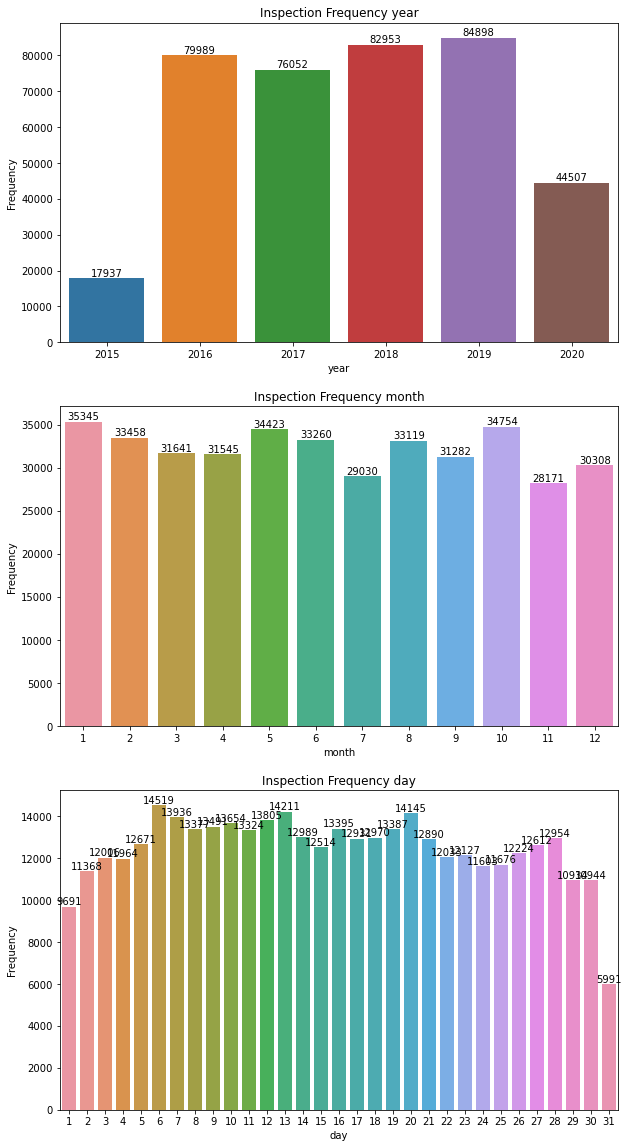

In [21]:
fig, ax = plt.subplots(3, 1, figsize = (10,20))

for idx, time in enumerate(['year','month','day']):

    ct = dropped_dup[time].value_counts().sort_index()
    
    ax[idx] = sns.barplot(x = ct.index, y = ct.values, order = ct.index, ax = ax[idx])
    
    ax[idx].set_xlabel(time)
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Inspection Frequency {}'.format(time))
    
    rects = ax[idx].patches
    labels = ct.values
    
    for rect, label in zip(rects,labels):
        x = rect.get_x() + rect.get_width()/2
        y = rect.get_height() + 5
        ax[idx].text(x,y,label, ha = 'center', va = 'bottom')
    
plt.show()
    

### Quartely and Monthly Inspection Count by Year

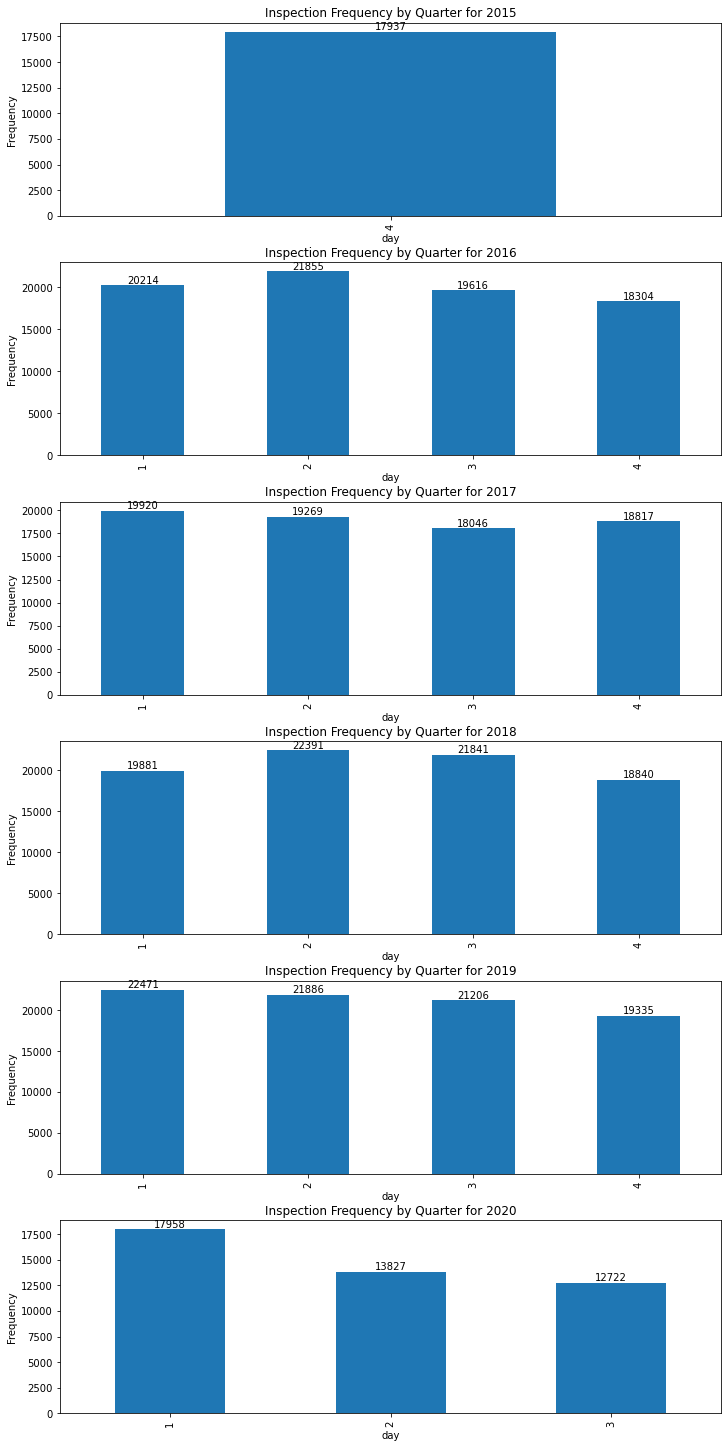

In [22]:
#Quarterly Inspection Count by Year

fig, ax = plt.subplots(6,1, figsize = (10,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    cnt = dropped_dup[dropped_dup['year']==year]['quarter'].value_counts().sort_index()
    
    ax[idx] = cnt.plot.bar(ax = ax[idx])
    
    ax[idx].set_xlabel(time)
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Inspection Frequency by Quarter for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
    rects = ax[idx].patches
    labels = cnt.values
    
    for rect, label in zip(rects,labels):
        x = rect.get_x() + rect.get_width()/2
        y = rect.get_height() + 5
        ax[idx].text(x,y,label, ha = 'center', va = 'bottom')
        
plt.show()

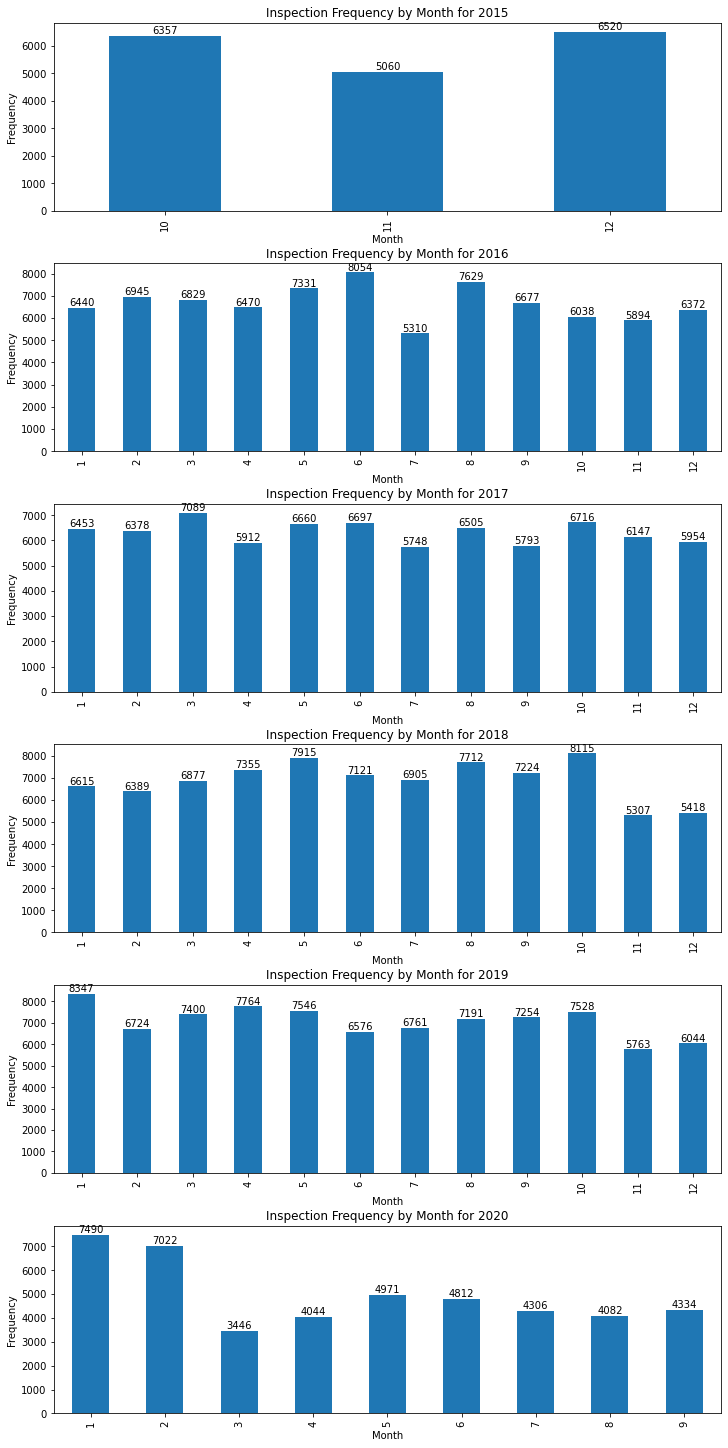

In [23]:
#Monthly Inspection Count by Year

fig, ax = plt.subplots(6,1, figsize = (10,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    cnt = dropped_dup[dropped_dup['year']==year]['month'].value_counts().sort_index()
    
    ax[idx] = cnt.plot.bar(ax = ax[idx])
    
    ax[idx].set_xlabel('Month')
    ax[idx].set_ylabel('Frequency')
    ax[idx].set_title('Inspection Frequency by Month for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
    rects = ax[idx].patches
    labels = cnt.values
    
    for rect, label in zip(rects,labels):
        x = rect.get_x() + rect.get_width()/2
        y = rect.get_height() + 5
        ax[idx].text(x,y,label, ha = 'center', va = 'bottom')
        
plt.show()

* Zip Analysis with duplicates removed!

### Score Distribution on Dropped Duplicate Serial Numbers

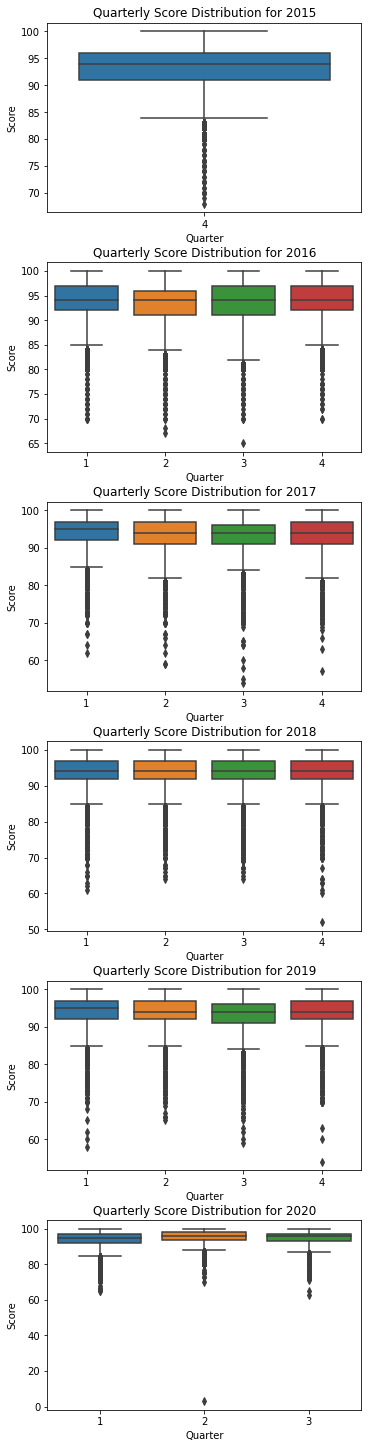

In [24]:
fig, ax = plt.subplots(6,1, figsize = (5,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    data = dropped_dup[dropped_dup['year']==year]
    sns.boxplot(x='quarter',y='score',data = data,ax = ax[idx])
    
   
    ax[idx].set_xlabel('Quarter')
    ax[idx].set_ylabel('Score')
    ax[idx].set_title('Quarterly Score Distribution for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
       
plt.show()

In [25]:
dropped_dup.groupby(['year','quarter'])['score'].describe()

count       mean       std   min   25%   50%   75%    max
year quarter                                                             
2015 4        17937.0  93.605508  3.821352  68.0  91.0  94.0  96.0  100.0
2016 1        20214.0  93.953646  3.623240  70.0  92.0  94.0  97.0  100.0
     2        21855.0  93.690368  3.731921  67.0  91.0  94.0  96.0  100.0
     3        19616.0  93.861185  3.683232  65.0  91.0  94.0  97.0  100.0
     4        18304.0  94.008687  3.588438  70.0  92.0  94.0  97.0  100.0
2017 1        19920.0  94.036898  3.823638  62.0  92.0  95.0  97.0  100.0
     2        19269.0  93.750272  3.936281  59.0  91.0  94.0  97.0  100.0
     3        18046.0  93.397761  4.239811  54.0  91.0  94.0  96.0  100.0
     4        18817.0  93.703088  4.023476  57.0  91.0  94.0  97.0  100.0
2018 1        19881.0  93.858810  3.954652  61.0  92.0  94.0  97.0  100.0
     2        22391.0  93.860971  3.829158  64.0  92.0  94.0  97.0  100.0
     3        21841.0  93.718191  4.037499  64.0  92.0  94.0  97.0  100.0
     4        18840.0  93.884076  3.874421  52.0  92.0  94.0  97.0  100.0
2019 1        22471.0  94.087179  3.763610  58.0  92.0  95.0  97.0  100.0
     2        21886.0  93.905510  3.769862  65.0  92.0  94.0  97.0  100.0
     3        21206.0  93.529096  4.086183  59.0  91.0  94.0  96.0  100.0
     4        19335.0  93.749211  3.954359  54.0  92.0  94.0  97.0  100.0
2020 1        17958.0  94.066099  3.666231  65.0  92.0  95.0  97.0  100.0
     2        13827.0  95.364794  3.318979   3.0  94.0  96.0  98.0  100.0
     3        12722.0  95.015092  3.407233  63.0  93.0  96.0  97.0  100.0

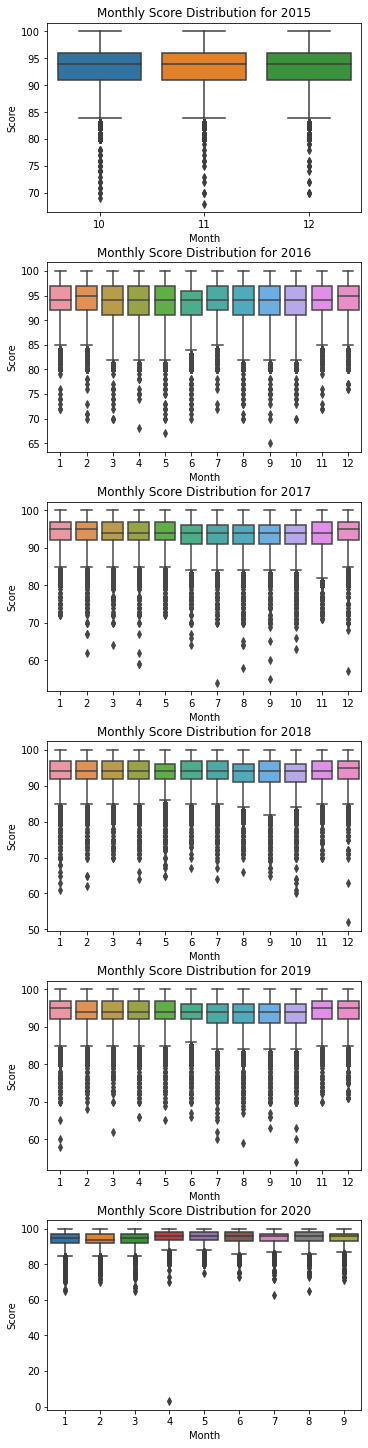

In [26]:
fig, ax = plt.subplots(6,1, figsize = (5,20))
years = [2015,2016,2017,2018,2019,2020]

for idx, year in enumerate(years):

    data = dropped_dup[dropped_dup['year']==year]
    sns.boxplot(x='month',y='score',data = data,ax = ax[idx])
    
   
    ax[idx].set_xlabel('Month')
    ax[idx].set_ylabel('Score')
    ax[idx].set_title('Monthly Score Distribution for {}'.format(year))
    fig.tight_layout(pad = 0.3)
    
       
plt.show()

In [27]:
dropped_dup.groupby(['year','month'])['score'].describe()

count       mean       std   min   25%   50%   75%    max
year month                                                            
2015 10     6357.0  93.374390  3.988675  69.0  91.0  94.0  96.0  100.0
     11     5060.0  93.630040  3.814316  68.0  91.0  94.0  96.0  100.0
     12     6520.0  93.811810  3.644127  70.0  91.0  94.0  96.0  100.0
2016 1      6440.0  93.996429  3.556194  72.0  92.0  94.0  97.0  100.0
     2      6945.0  94.116199  3.539630  70.0  92.0  95.0  97.0  100.0
     3      6829.0  93.747987  3.758164  70.0  91.0  94.0  97.0  100.0
     4      6470.0  93.799536  3.704518  68.0  91.0  94.0  97.0  100.0
     5      7331.0  93.743282  3.720979  67.0  91.0  94.0  97.0  100.0
     6      8054.0  93.554507  3.760057  70.0  91.0  94.0  96.0  100.0
     7      5310.0  94.021846  3.556859  72.0  92.0  94.0  97.0  100.0
     8      7629.0  93.834185  3.728377  70.0  91.0  94.0  97.0  100.0
     9      6677.0  93.764265  3.726232  65.0  91.0  94.0  97.0  100.0
     10     6038.0  93.908910  3.707097  70.0  91.0  94.0  97.0  100.0
     11     5894.0  93.912623  3.591759  72.0  92.0  94.0  97.0  100.0
     12     6372.0  94.192090  3.462218  76.0  92.0  95.0  97.0  100.0
2017 1      6453.0  94.090346  3.774780  72.0  92.0  95.0  97.0  100.0
     2      6378.0  94.118062  3.853644  62.0  92.0  95.0  97.0  100.0
     3      7089.0  93.915221  3.838185  64.0  92.0  94.0  97.0  100.0
     4      5912.0  93.826624  3.995415  59.0  92.0  94.0  97.0  100.0
     5      6660.0  93.792793  3.787493  72.0  92.0  94.0  97.0  100.0
     6      6697.0  93.640585  4.026011  64.0  91.0  94.0  96.0  100.0
     7      5748.0  93.491127  4.159190  54.0  91.0  94.0  96.0  100.0
     8      6505.0  93.252114  4.303388  58.0  91.0  94.0  96.0  100.0
     9      5793.0  93.468669  4.243425  55.0  91.0  94.0  96.0  100.0
     10     6716.0  93.391007  4.227612  63.0  91.0  94.0  96.0  100.0
     11     6147.0  93.728648  3.935855  71.0  91.0  94.0  97.0  100.0
     12     5954.0  94.028720  3.846721  57.0  92.0  95.0  97.0  100.0
2018 1      6615.0  93.803930  4.114382  61.0  92.0  94.0  97.0  100.0
     2      6389.0  93.807951  3.959433  62.0  92.0  94.0  97.0  100.0
     3      6877.0  93.958848  3.788615  70.0  92.0  94.0  97.0  100.0
     4      7355.0  93.844460  3.881156  64.0  92.0  94.0  97.0  100.0
     5      7915.0  93.812129  3.888866  65.0  92.0  94.0  96.0  100.0
     6      7121.0  93.932313  3.705700  67.0  92.0  94.0  97.0  100.0
     7      6905.0  93.857350  3.907359  64.0  92.0  94.0  97.0  100.0
     8      7712.0  93.661437  3.997584  66.0  91.0  94.0  96.0  100.0
     9      7224.0  93.645764  4.196352  65.0  91.0  94.0  97.0  100.0
     10     8115.0  93.600493  4.064655  60.0  91.0  94.0  96.0  100.0
     11     5307.0  94.006218  3.690607  70.0  92.0  94.0  97.0  100.0
     12     5418.0  94.189184  3.726705  52.0  92.0  95.0  97.0  100.0
2019 1      8347.0  94.213849  3.805719  58.0  92.0  95.0  97.0  100.0
     2      6724.0  93.992415  3.806971  68.0  92.0  94.0  97.0  100.0
     3      7400.0  94.030405  3.671689  62.0  92.0  94.0  97.0  100.0
     4      7764.0  93.916151  3.705270  66.0  92.0  94.0  97.0  100.0
     5      7546.0  94.004373  3.664760  65.0  92.0  94.0  97.0  100.0
     6      6576.0  93.779501  3.956729  66.0  92.0  94.0  96.0  100.0
     7      6761.0  93.590149  4.064191  60.0  91.0  94.0  96.0  100.0
     8      7191.0  93.505771  4.098229  59.0  91.0  94.0  96.0  100.0
     9      7254.0  93.495313  4.094589  63.0  91.0  94.0  96.0  100.0
     10     7528.0  93.270590  4.308667  54.0  91.0  94.0  96.0  100.0
     11     5763.0  94.034184  3.714897  70.0  92.0  95.0  97.0  100.0
     12     6044.0  94.073627  3.643974  71.0  92.0  95.0  97.0  100.0
2020 1      7490.0  94.128171  3.637297  65.0  92.0  95.0  97.0  100.0
     2      7022.0  93.975648  3.653463  70.0  92.0  94.0  97.0  100.0
     3      3446.0  94.115496  3.751189  65.0  92.0  95.0  97.0  100.0
     4      4044.0  95.616963  3.5094

* 2020 might have a transcription error with a score value of 3.
* Use heatmap to see if there is a strong correlation with year, months, and  days
*

### Score Distrubution by Zip

In [40]:
zip_split = dropped_dup.groupby('facility_zip')['score'].mean().sort_values(ascending=False)
zip_split

facility_zip
90407    100.000000
98124     99.500000
90226     99.500000
91763     99.500000
90053     99.333333
            ...    
90253     88.833333
90244     87.000000
90052     84.166667
91743     81.000000
91749     80.500000
Name: score, Length: 413, dtype: float64

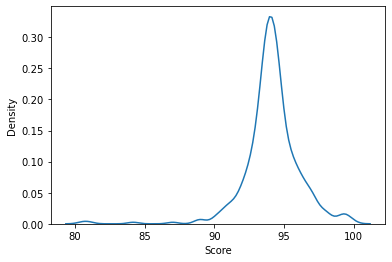

In [46]:
sns.kdeplot(data=zip_split)
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend([],[], frameon=False)

### Score Distribution by Program Element - Dupllicate Removed

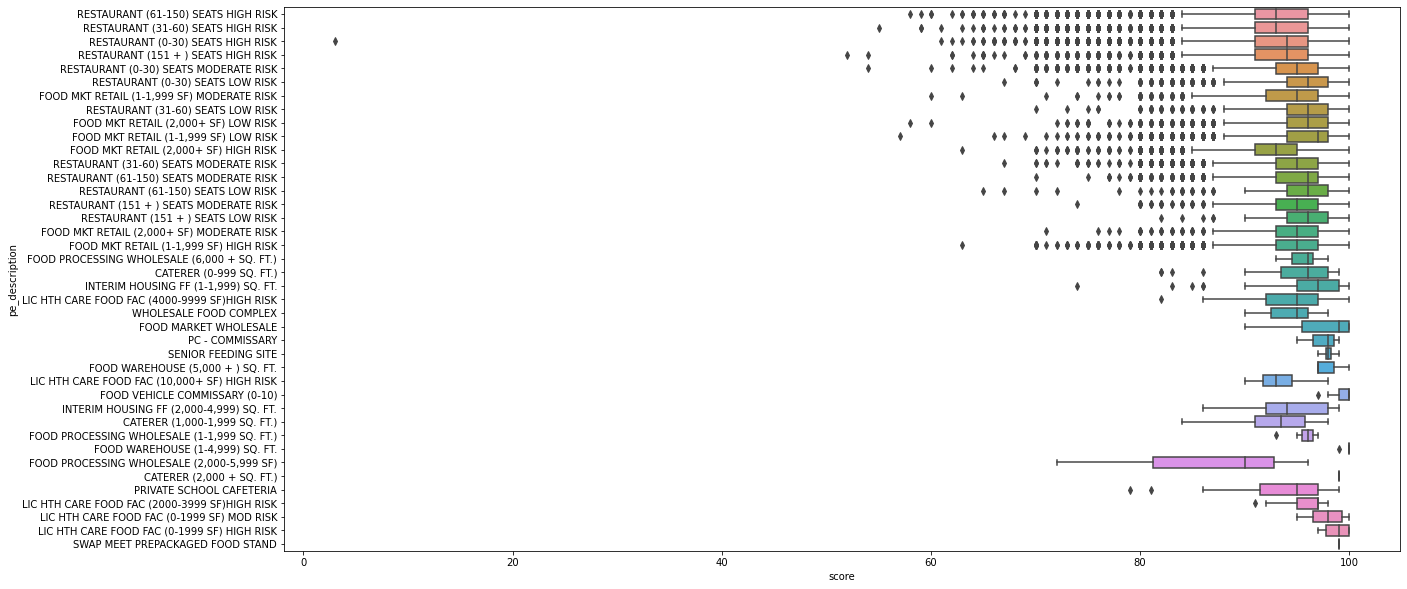

In [47]:
plt.figure(figsize=(20,10))

sns.boxplot(x = 'score',y = 'pe_description', data = dropped_dup, orient = 'h')

### Score Distribution by Violation Type - Duplicate NOT Removed

### Explore violation data

In [48]:
merged_df['violation__status'].value_counts()

OUT OF COMPLIANCE       1048234
VIOLATION                     3
HOUSING NON-CRITICAL          1
Name: violation__status, dtype: int64

In [49]:
merged_df[merged_df['violation__status']=='VIOLATION']

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter,violation_category
515722,2017-10-13,OW0102120,"TAWAT & SON, INC.",FA0138823,BABY ELEPHANT THAI CUISINE,PR0123191,BABY ELEPHANT THAI CUISINE,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,...,EE0000263,VIOLATION,F029,"# 29. Toxic substances properly identified, st...",1.0,2017,10,13,4,Retail
565367,2018-01-16,OW0007408,"CHENG, EANG",FA0025782,MR GOOD'S DONUTS,PR0010753,MR GOOD'S DONUTS,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,EE0000821,VIOLATION,F050,# 51. Permit Suspension,0.0,2018,1,16,1,nan
857825,2019-01-23,OW0100745,"PARK, SUNG H. ET AL",FA0137619,SUSHI WAKANA,PR0121736,SUSHI WAKANA,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,EE0000015,VIOLATION,F050,# 51. Permit Suspension,0.0,2019,1,23,1,nan


In [50]:
merged_df['violation_code'].unique()

array(['F027', 'F037', 'F040', 'F006', 'F036', 'F044', 'F033', 'F035',
       nan, 'F042', 'F039', 'F030', 'F007', 'F052', 'F004', 'F029',
       'F014', 'F038', 'F043', 'F001', 'F034', 'F048', 'F032', 'F023',
       'F021', 'F046', 'F025', 'F013', 'F041', 'F005', 'F026', 'F049',
       'F016', 'F031', 'F009', 'F053', 'F022', 'F050', 'F055', 'F054',
       'F008', 'F011', 'W024', 'W026', 'W052', 'F045', 'F024', 'F015',
       'F018', 'F002', 'F028', 'F019', 'F047', 'F010', 'W028', 'W034',
       'F012', 'F003', 'W005', 'W047', 'W001', 'W051', 'W006', 'F051',
       'W053', 'W011', 'F017', 'W023', 'SF15', 'W041', 'W027', 'W014',
       'W044', 'W020', 'W050', 'W017', 'W003', 'W031', 'W039', 'W004',
       'W016', 'F058', 'F057', 'W029', 'H102', 'F056', 'W048', 'W035',
       'W019', 'W033', 'W021', 'W032', 'MF08', 'MF45', 'MF36', 'F020',
       'W022', 'W025', 'W030', 'W007', 'MP15', 'CV30', 'CV31', 'CV27',
       'CV45', 'CV29'], dtype=object)

* Check out F002, F005, F007-F011, F013-F15, F20-23 and F50 which is permit suspension

In [51]:
lst = ['F002','F005','F007','F008','F009','F010','F011','F013','F014','F015','F020','F021','F022','F023','F050']


b = pd.DataFrame()
for i in lst:
    a = merged_df[merged_df['violation_code']==i].head(2)
    b = b.append(a)
b

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter,violation_category
3002,2015-11-12,OW0184217,LARSEN'S STEAKHOUSE,FA0178473,LARSEN'S STEAKHOUSE,PR0171905,LARSEN'S STEAKHOUSE,ACTIVE,1641,RESTAURANT (151 + ) SEATS HIGH RISK,...,EE0000573,OUT OF COMPLIANCE,F002,"# 02. Communicable disease; reporting, restric...",4.0,2015,11,12,4,Major
49482,2015-11-14,OW0128454,JIN CONG WANG,FA0165172,U.S. CHINESE FOOD,PR0153487,U.S. CHINESE FOOD,INACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,EE0000006,OUT OF COMPLIANCE,F002,"# 02. Communicable disease; reporting, restric...",4.0,2015,11,14,4,Major
169,2016-04-28,OW0106857,FC JUICE PARTNERS CALIFORNIA LLC,FA0222662,JAMBA JUICE,PR0177688,JAMBA JUICE,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,EE0000214,OUT OF COMPLIANCE,F005,# 05. Hands clean and properly washed; gloves ...,4.0,2016,4,28,2,Major
326,2016-09-19,OW0006768,CERRITOS L AND L INC,FA0032778,L AND L HAWAIIAN BARBEQUE,PR0000718,L AND L HAWAIIAN BARBEQUE,INACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,...,EE0000029,OUT OF COMPLIANCE,F005,# 05. Hands clean and properly washed; gloves ...,2.0,2016,9,19,3,Minor
22,2015-12-16,OW0031302,"SALAZAR, RAMON R",FA0045003,R & R SOUL FOOD,PR0038525,R & R SOUL FOOD,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,...,EE0000834,OUT OF COMPLIANCE,F007,# 07. Proper hot and cold holding temperatures,2.0,2015,12,16,4,Minor
36,2015-12-30,OW0012090,FONDA DON CHON RESTAURANT IN,FA0013838,FONDA DON CHON,PR0039266,FONDA DON CHON,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000136,OUT OF COMPLIANCE,F007,# 07. Proper hot and cold holding temperatures,4.0,2015,12,30,4,Major
702,2018-01-03,OW0242515,KATSUNORI HISANAGA,FA0248008,YUI,PR0196669,YUI,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,...,EE0000886,OUT OF COMPLIANCE,F008,# 08. Time as a public health control; procedu...,2.0,2018,1,3,1,Minor
734,2018-02-21,OW0036648,"TSIBOUKAS, ALEX",FA0022626,FANTASTIC CHARBURGER,PR0024069,FANTASTIC CHARBURGER,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,...,EE0000092,OUT OF COMPLIANCE,F008,# 08. Time as a public health control; procedu...,2.0,2018,2,21,1,Minor
345,2016-10-13,OW0039327,WU JIAN YANG,FA0041601,YANG'S RESTAURANT,PR0029227,YANG'S RESTAURANT,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,...,EE0000535,OUT OF COMPLIANCE,F009,# 09. Proper cooling methods,2.0,2016,10,13,4,Minor
384,2016-12-08,OW0025317,MUNDANAS INC,FA0021345,LAS ANITAS,PR0032340,LAS ANITAS,ACTIVE,1635,RESTAURANT (31-60) SEATS HIGH RISK,...,EE0000360,OUT OF COMPLIANCE,F009,# 09. Proper cooling methods,4.0,2016,12,8,4,Major


* Filter Major Violations using pts
---
#### Major Violations 
* Major Violations have a point deduction of 4pts or 11pts. 
* The violation code is lst above. --> Some violation codes can be marked as minor violations hence the conditional loop.

In [52]:
major_violations = merged_df.loc[(merged_df['points'] == 4.0) | (merged_df['points'] == 11.0)]
major_violations.shape

(50881, 28)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6B34546D0>]],
      dtype=object)

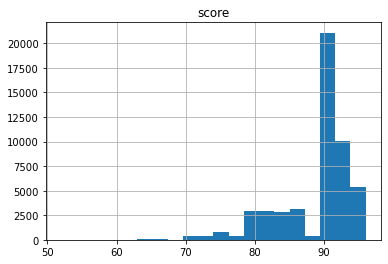

In [53]:
major_violations.hist(column = 'score', bins = 20)

TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

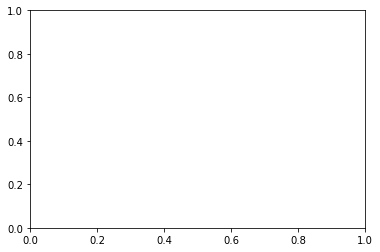

In [54]:
sns.kdeplot(data = major_violations,x='score', cut = 0)

In [ ]:
major_violations['facility_zip'].value_counts().head(15)

In [55]:
(major_violations['record_id'] + ' : ' + major_violations['facility_name']).value_counts().head(30)

PR0189419 : PLANET HOLLYWOOD                 20
PR0156336 : GOLD HIBACHI BUFFET              19
PR0170854 : HAWAIIAN BBQ HOUSE               19
PR0031392 : BANH MI MY THO                   18
PR0156516 : PHO BANH MI CHE CALI             16
PR0168279 : HIBACHI GRILL BUFFET             16
PR0031553 : SAN SOO DANG                     15
PR0034955 : MONTEREY PALACE RESTAURANT       15
PR0023808 : THAI DISHES RESTAURANT           15
PR0028061 : CHINA BOY EXPRESS BAKERY         15
PR0177458 : EAST SEAFOOD BUFFET              15
PR0004316 : NBC SEAFOOD RESTAURANT           15
PR0148023 : JAMES BEACH                      15
PR0025993 : SAM WOO RESTAURANT               14
PR0191208 : SUNDAY BISTRO                    14
PR0018307 : KANG KANG SHAU MAY RESTAURAN     14
PR0039287 : HOP WOO BBQ RESTAURANT           14
PR0003465 : SHAU MAY RESTAURANT              14
PR0010156 : NICE TIME CAFE                   14
PR0014334 : BANH MI & CHE CALI REST/MKT      13
PR0016592 : LUNASIA                     

In [56]:
merged_df[(merged_df['record_id'] == 'PR0189419') & (merged_df['year']==2018)]

,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter,violation_category
593782,2018-03-06,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F025,# 25. Personal cleanliness and hair restraints,1.0,2018,3,6,1,Retail
593783,2018-03-06,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F027,# 27. Food separated and protected,1.0,2018,3,6,1,Retail
593784,2018-03-06,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0,2018,3,6,1,Retail
593785,2018-03-06,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F035,# 35. Equipment/Utensils - approved; installed...,1.0,2018,3,6,1,Retail
593786,2018-03-06,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F033,# 33. Nonfood-contact surfaces clean and in go...,1.0,2018,3,6,1,Retail
604931,2018-02-16,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F044,"# 44. Floors, walls and ceilings: properly bui...",1.0,2018,2,16,1,Retail
604932,2018-02-16,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F049,# 50. Impoundment of unsanitary equipment or food,0.0,2018,2,16,1,nan
604933,2018-02-16,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",1.0,2018,2,16,1,Retail
604934,2018-02-16,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F037,# 37. Adequate ventilation and lighting; desig...,1.0,2018,2,16,1,Retail
604935,2018-02-16,OW0237254,PLANET EXPRESS (LAX) LLC,FA0241313,PLANET HOLLYWOOD,PR0189419,PLANET HOLLYWOOD,ACTIVE,1638,RESTAURANT (61-150) SEATS HIGH RISK,...,EE0000633,OUT OF COMPLIANCE,F054,# 52. Multiple Major Critical Violations / Inc...,3.0,2018,2,16,1,DoubleMajor


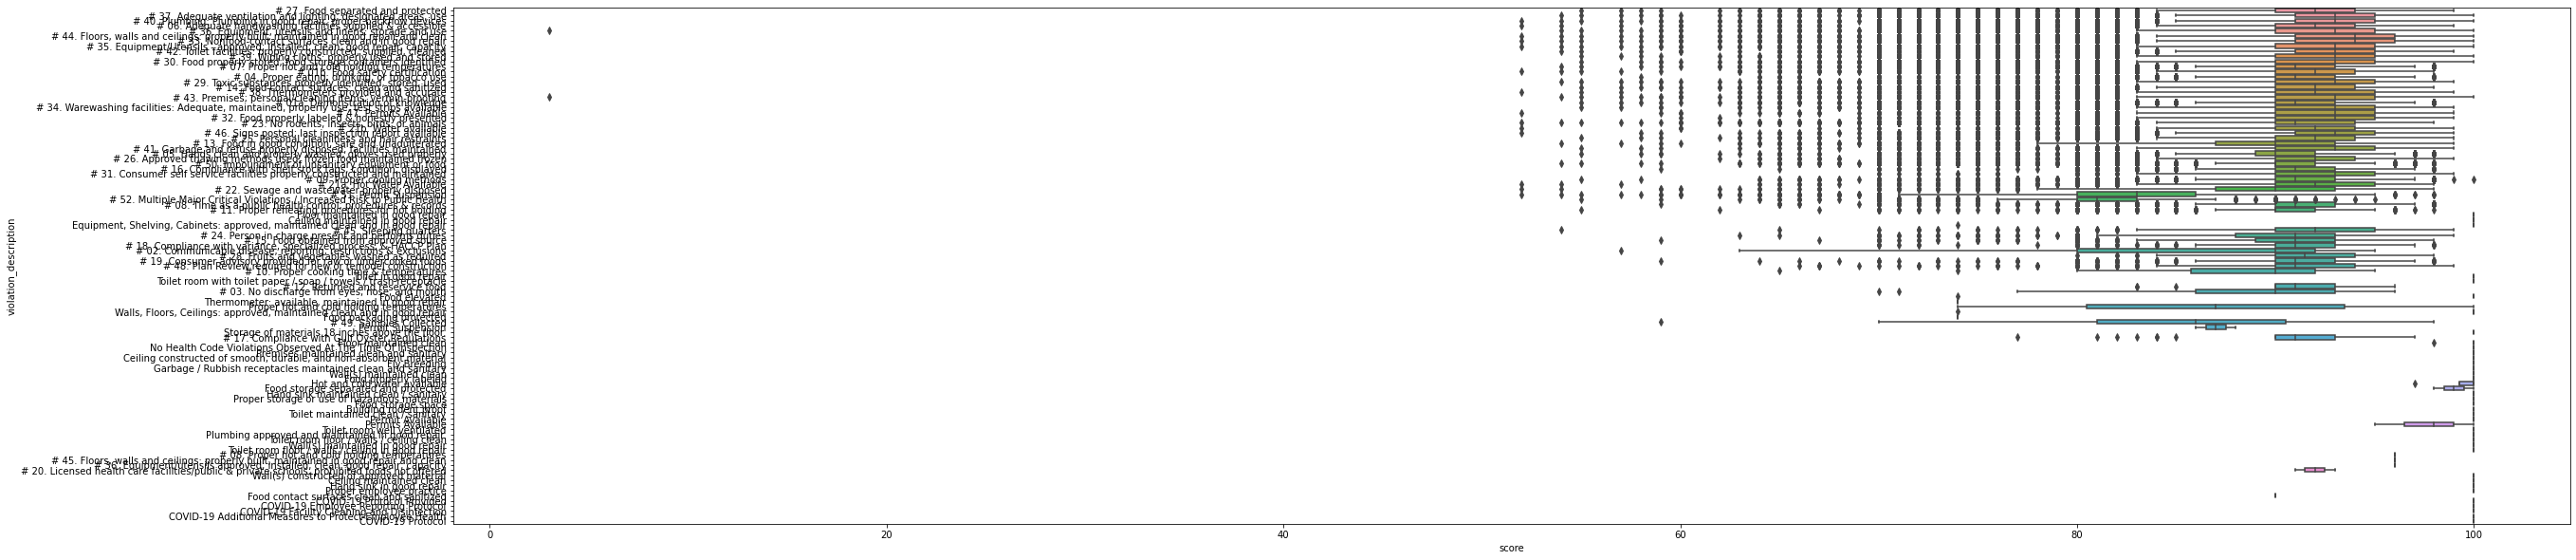

In [57]:
plt.figure(figsize=(40,10))

sns.boxplot(x = 'score',y = 'violation_description', data = merged_df, orient = 'h')

### Major Risks and Closure

### Categorizing Critical Risk (Minor & Major), Good Retail Practices, and Compliance Violations

In [58]:
merged_df['points'].value_counts(dropna=False)

1.0     792962
2.0     187705
NaN     162415
4.0      48694
0.0      14366
3.0       2324
11.0      2187
Name: points, dtype: int64

### Notes about points
* 4 pts is MAJOR VIOLATION
* 3 pts is the additional reduction for two major violations
* 2 pts is a Minor Violation
* 1 pt is Good Retail Practices Violation
* Permit suspension due to vermin infestation, no water, or now sewage available, additional 7pt deduction for each closure type -> 4 + 7 = 11 so 11 pts must be one of those
* What are the NaN Values and What are the 0.0 Values?



In [59]:
zero_pts = merged_df.loc[merged_df['points']==0.0]
zero_pts.iloc[:,0:18].head()


,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,facility_address,facility_city,facility_state,facility_zip,service_code,service_description,score,serial_number
236,2016-06-13,OW0024742,MOHAMMED IBRAHIM,FA0071276,SUBWAY SANDWICHES,PR0040301,SUBWAY SANDWICHES,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,11340 E 183RD ST,ARTESIA,CA,90701,1,ROUTINE INSPECTION,94,DA0603704
357,2016-11-02,OW0181069,JOSE LUIS CARDENAS,FA0174387,EL PICOSO,PR0167286,EL PICOSO,INACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,303 S AZUSA AVE,AZUSA,CA,91702,1,ROUTINE INSPECTION,90,DAGFLF9NL
506,2017-05-19,OW0004978,"BOLLINGER, BEN",FA0059090,CANDLELIGHT PAVILION,PR0035126,CANDLELIGHT PAVILION,ACTIVE,1641,RESTAURANT (151 + ) SEATS HIGH RISK,455 W FOOTHILL BLVD,CLAREMONT,CA,91711,1,ROUTINE INSPECTION,91,DA40VQHD7
547,2017-07-17,OW0007871,CHOP STOP INC.,FA0059770,CHOP STOP,PR0023182,CHOP STOP,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,1001 N S F BLVD UNIT 110,BURBANK,CA,91504,1,ROUTINE INSPECTION,87,DAAZYYIHM
738,2018-02-22,OW0239724,SWELL77,FA0244526,UZUMAKI,PR0192842,UZUMAKI,ACTIVE,1632,RESTAURANT (0-30) SEATS HIGH RISK,11060 WASHINGTON BLVD STE A,CULVER CITY,CA,90066,1,ROUTINE INSPECTION,94,DA6XMCW6T


In [60]:
null_pts = merged_df[merged_df['points'].isnull()]
null_pts['score'].value_counts().head()

90    18331
96    17691
95    17075
97    16518
94    16116
Name: score, dtype: int64

In [61]:
perf_score = merged_df[merged_df['score']==100]
perf_score['points'].value_counts(dropna=False)

NaN    9240
0.0     109
1.0      14
2.0       1
Name: points, dtype: int64

* Null doesn't necessarily mean that the restaurants got perfect sores
* Score of 100 doesn't necessarily mean that the points is 0 or Nan......
* So there is some transcription error.....

* How do I deal with this??? ASK MENTOR!!!

In [62]:
print(merged_df[(merged_df['points']==2) &(merged_df['score']==100)])
merged_df[merged_df['serial_number']=='DABH9GD40']

       activity_date   owner_id                 owner_name facility_id  \
360311    2017-02-17  OW0004937  BODEGA LATINA CORPORATION   FA0061611   

       facility_name  record_id                 program_name program_status  \
360311      EL SUPER  PR0032332  EL SUPER - TORTILLERIA/DELI         ACTIVE   

        program_element_(pe)                         pe_description  ...  \
360311                  1631  RESTAURANT (0-30) SEATS MODERATE RISK  ...   

       employee_id  violation__status violation_code  \
360311   EE0000503  OUT OF COMPLIANCE           F009   

               violation_description  points  year  month day quarter  \
360311  # 09. Proper cooling methods     2.0  2017      2  17       1   

       violation_category  
360311              Minor  

[1 rows x 28 columns]


,activity_date,owner_id,owner_name,facility_id,facility_name,record_id,program_name,program_status,program_element_(pe),pe_description,...,employee_id,violation__status,violation_code,violation_description,points,year,month,day,quarter,violation_category
360310,2017-02-17,OW0004937,BODEGA LATINA CORPORATION,FA0061611,EL SUPER,PR0032332,EL SUPER - TORTILLERIA/DELI,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,EE0000503,OUT OF COMPLIANCE,F044,"# 44. Floors, walls and ceilings: properly bui...",1.0,2017,2,17,1,Retail
360311,2017-02-17,OW0004937,BODEGA LATINA CORPORATION,FA0061611,EL SUPER,PR0032332,EL SUPER - TORTILLERIA/DELI,ACTIVE,1631,RESTAURANT (0-30) SEATS MODERATE RISK,...,EE0000503,OUT OF COMPLIANCE,F009,# 09. Proper cooling methods,2.0,2017,2,17,1,Minor


TypeError: cannot astype a datetimelike from [datetime64[ns]] to [float64]

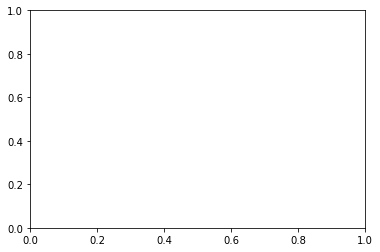

In [63]:
sns.kdeplot(data = dropped_dup, x = 'score', hue = 'pe_description')

###  Look at Score Distribution on Dropped Duplicate Serial Number!

In [ ]:
merged_df[('violation_code','violation_id')].unique()